In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [31]:
def get_mean_std(norm_lower, norm_upper):
    std = (norm_upper-norm_lower)/4
    mean = norm_upper - (2*std)
    return mean, std

In [32]:
get_mean_std(0, 2)

(1.0, 0.5)

In [33]:
feat_arr = [{'name':'hemoglobin', 'lower':12, 'upper':17.2, 'abnorm_lower':6, 'abnorm_upper':20},
            {'name':'ferritin', 'lower':10, 'upper':336, 'abnorm_lower':1, 'abnorm_upper': 700},
            {'name':'ret_count', 'lower':0.5, 'upper':2.5, 'abnorm_lower':0.1, 'abnorm_upper':6},
            {'name':'segmented_neutrophils', 'lower':0, 'upper':1}, #0 absent
            {'name':'serum_iron', 'lower':60, 'upper':170, 'abnorm_lower':20, 'abnorm_upper':250},
            {'name':'tibc', 'lower':240, 'upper':450, 'abnorm_lower': 100, 'abnorm_upper':700},
            {'name':'rbc', 'lower':3.8, 'upper':5.9, 'abnorm_lower': 2.5, 'abnorm_upper':7},
            {'name':'mcv', 'lower':80, 'upper':100, 'abnorm_lower': 75, 'abnorm_upper':107},
            {'name':'age', 'lower':20, 'upper':90, 'abnorm_lower':18, 'abnorm_upper':95},
            {'name':'gender', 'lower':0, 'upper':1}, #0=Female 1=male
            {'name':'indirect_bilirubin', 'lower':0.2, 'upper':1.2, 'abnorm_lower':0, 'abnorm_upper':3},
            {'name':'transferrin', 'lower':204, 'upper':360, 'abnorm_lower':150, 'abnorm_upper':450},
            {'name':'creatinine', 'lower':0.6, 'upper':1.3, 'abnorm_lower':0.2, 'abnorm_upper':2},
            {'name':'cholestrol', 'lower':30, 'upper':100, 'abnorm_lower':0, 'abnorm_upper':150},
            {'name':'copper', 'lower':62, 'upper':140, 'abnorm_lower':30, 'abnorm_upper':130},
            {'name':'ethanol', 'lower':0, 'upper':50, 'abnorm_lower':0, 'abnorm_upper':80},
            {'name':'folate', 'lower':2.7, 'upper':17, 'abnorm_lower':0.5, 'abnorm_upper':30},
            {'name':'glucose', 'lower':70, 'upper':100, 'abnorm_lower':40, 'abnorm_upper':140},
           ]

In [34]:
# def clip_value(row, col, lowest_val, highest_val):
#     if row[col] <= lowest_val:
#         new_val = np.random.uniform(lowest_val, highest_val)
#     else:
#         new_val = row[col]
#     return new_val

In [35]:
def create_label(row):
    if row['hemoglobin']> 13:
        return 'No anemia'
    elif (row['hemoglobin'] > 12) & (row['gender']==0):
        return 'No anemia'
    else:
        if row['mcv']<80 :
            if row['ferritin']<30:
                return 'Iron deficiency anemia'
            elif row['ferritin']>100:
                return 'Anemia of chronic disease'
            elif row['tibc']<450:
                return 'Anemia of chronic disease'
            elif row['tibc']>=450:
                return 'Iron deficiency anemia'
            else:
                return 'Unspecified anemia'
        elif row['mcv']<=100:
            if row['ret_count'] <=2:
                return 'Aplastic anemia'
            elif row['ret_count'] > 2:
                return 'Hemolytic anemia'
            else:
                return 'Unspecified anemia'

        elif row['mcv']> 100:
            if row['segmented_neutrophils']>0:
                return 'Vitamin B12/Folate deficiency anemia'
            else:
                return 'Unspecified anemia'
        else:
            return 'Unspecified anemia'

In [36]:
# def normal_dist(df, feat_dict, num=None):
#     col_name = feat_dict['name']
#     mean, std = get_mean_std(feat_dict['lower'], feat_dict['upper'])
#     #print(f'name:{col_name}, mean:{mean}, std:{std}')
#     df[col_name] = np.random.normal(mean, std, num)
#     col_values = df.apply(lambda row: clip_value(row, col_name, feat_dict['abnorm_lower'], feat_dict['lower']), axis=1).tolist()
#     return col_values

In [37]:
def uniform_dist(df, feat_dict, num=None):
    col_name = feat_dict['name']
    col_values = np.random.uniform(feat_dict['abnorm_lower'], feat_dict['abnorm_upper'], num)
    return col_values

In [38]:
def create_dataset(sample_num, dist_type='uniform'):
    dataset = pd.DataFrame()
    for feat_dict in feat_arr:
        if feat_dict['name'] in ['gender', 'segmented_neutrophils']:
            dataset[feat_dict['name']] = np.random.choice([feat_dict['lower'], feat_dict['upper']], sample_num)
        elif dist_type=='normal':
            dataset[feat_dict['name']] = normal_dist(dataset, feat_dict, sample_num)
        else:
            dataset[feat_dict['name']] = uniform_dist(dataset, feat_dict, sample_num)
    dataset['old_label'] = dataset.apply(lambda row: create_label(row), axis=1)
    return dataset

#### delete from here

#### end here

In [39]:
# norm_dataset = create_dataset(1000000, 'normal')
# norm_dataset.head(3)

In [40]:
# norm_dataset.gender.value_counts()

In [41]:
# norm_dataset.label.value_counts()

#### Uniform distribution

In [42]:
uniform_dataset = create_dataset(500000, 'uniform')

In [43]:
uniform_dataset.head(3)

,hemoglobin,ferritin,ret_count,segmented_neutrophils,serum_iron,tibc,rbc,mcv,age,gender,indirect_bilirubin,transferrin,creatinine,cholestrol,copper,ethanol,folate,glucose,old_label
0,11.243562,210.077977,3.611418,0,218.036775,278.744646,3.636441,78.018120,86.370404,1,0.023658,304.995997,1.907599,48.457335,113.453604,40.948280,10.539183,90.434051,Anemia of chronic disease
1,19.310000,357.138739,2.251831,0,166.339471,664.997977,3.672425,97.706041,45.286651,1,0.241711,431.201168,0.406441,147.655611,70.859502,43.402668,23.180844,90.449374,No anemia
2,16.247915,451.115085,0.131716,0,230.701465,661.779913,6.899282,96.431631,51.278808,0,2.391879,285.282307,1.648165,15.259417,34.314192,11.548448,28.112940,122.910032,No anemia


In [44]:
uniform_dataset.describe()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,serum_iron,tibc,rbc,mcv,age,gender,indirect_bilirubin,transferrin,creatinine,cholestrol,copper,ethanol,folate,glucose
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,13.003971,350.769359,3.045332,0.498884,134.943555,400.026614,4.753610,90.993877,56.480173,0.499352,1.500213,299.894903,1.100455,74.970478,79.989495,40.001671,15.241994,90.064706
std,4.039662,201.756022,1.701648,0.499999,66.403089,173.246047,1.298912,9.245392,22.226400,0.500000,0.866253,86.562405,0.519701,43.352213,28.860783,23.093249,8.510158,28.885822
min,6.000031,1.000363,0.100003,0.000000,20.001088,100.000597,2.500006,75.000087,18.000030,0.000000,0.000002,150.000447,0.200001,0.000051,30.000102,0.000073,0.500014,40.000102
25%,9.500952,176.164267,1.572735,0.000000,77.406516,250.088456,3.628478,82.995188,37.238985,0.000000,0.751110,224.852627,0.649452,37.434317,55.042281,19.993881,7.875210,65.035262
50%,13.012940,350.600707,3.042479,0.000000,135.036083,399.866173,4.758423,90.979249,56.430450,0.000000,1.499021,299.995027,1.102095,74.922802,79.959037,40.007384,15.240238,90.104985
75%,16.498267,525.463125,4.517583,1.000000,192.382117,549.875849,5.878574,98.986917,75.744503,1.000000,2.250666,374.670476,1.550022,112.641018,104.973880,60.000531,22.615373,115.100372
max,19.999976,699.996456,5.999987,1.000000,249.999514,699.998180,6.999967,106.999996,94.999789,1.000000,2.999988,449.999975,1.999998,149.999887,129.999698,79.999894,29.999991,139.998894


In [45]:
uniform_dataset.gender.value_counts()

0    250324
1    249676
Name: gender, dtype: int64

In [46]:
uniform_dataset.old_label.value_counts()

No anemia                               268346
Hemolytic anemia                         98008
Aplastic anemia                          46480
Anemia of chronic disease                33479
Unspecified anemia                       25312
Vitamin B12/Folate deficiency anemia     25304
Iron deficiency anemia                    3071
Name: old_label, dtype: int64

#### Simulating missing values

In [47]:
def add_nans(df):
    for col in df.columns:
        if col not in ['old_label', 'hemoglobin', 'mcv', 'gender', 'age', 'gender']:
            col_frac = round(random.uniform(0.1, 0.7), 1)
            #print(f'col:{col}, frac:{col_frac}')
            #df[col] = df[col].sample(frac=col_frac, random_state=SEED).reset_index(drop=True)
            df.loc[df.sample(frac=col_frac, random_state=SEED).index, col] = np.nan
    df['label'] = df.apply(lambda row: create_label(row), axis=1)
    df['label'] = df['label'].fillna('Unspecified anemia')
    return df

In [48]:
uniform_df_with_nans = add_nans(uniform_dataset.copy())
uniform_df_with_nans = uniform_df_with_nans.drop(['old_label'], axis=1)
uniform_df_with_nans.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,serum_iron,tibc,rbc,mcv,age,gender,indirect_bilirubin,transferrin,creatinine,cholestrol,copper,ethanol,folate,glucose,label
0,11.243562,NaN,3.611418,0.0,218.036775,NaN,NaN,78.018120,86.370404,1,NaN,304.995997,NaN,48.457335,113.453604,NaN,10.539183,90.434051,Unspecified anemia
1,19.310000,357.138739,2.251831,0.0,166.339471,664.997977,3.672425,97.706041,45.286651,1,0.241711,431.201168,0.406441,147.655611,70.859502,43.402668,23.180844,90.449374,No anemia
2,16.247915,NaN,0.131716,NaN,NaN,NaN,NaN,96.431631,51.278808,0,NaN,NaN,NaN,15.259417,NaN,NaN,28.112940,NaN,No anemia
3,14.381219,694.530540,3.410418,1.0,64.362020,335.026698,3.611168,79.415885,86.571007,0,0.869521,352.346424,1.409694,79.928174,67.817426,32.048900,14.714770,133.970358,No anemia
4,8.184261,487.067819,5.389765,0.0,32.610605,577.489247,6.000037,90.184231,48.706332,0,NaN,206.654372,1.789641,134.362148,38.559706,36.376891,24.166456,59.624352,Hemolytic anemia


In [49]:
uniform_df_with_nans.label.value_counts()

No anemia                               268346
Hemolytic anemia                         88192
Unspecified anemia                       65601
Aplastic anemia                          41921
Vitamin B12/Folate deficiency anemia     17601
Anemia of chronic disease                16830
Iron deficiency anemia                    1509
Name: label, dtype: int64

In [23]:
# total_sampled_df = pd.DataFrame()
# min_count_value = uniform_df_with_nans.label.value_counts().min()
# for label in uniform_df_with_nans.label.unique():
#     label_df = uniform_df_with_nans[uniform_df_with_nans.label==label]
#     label_indices = list(label_df.index)
#     label_count = uniform_df_with_nans.label.value_counts()[label]
#     percentage = ((label_count-min_count_value)/min_count_value)
#     if percentage == 0:
#         total_sampled_df = total_sampled_df.append(label_df)
#     else:
#         if label == 'Unspecified anemia':
#             new_label_count = 1000
#         elif percentage < 50:
#             new_label_count = int(0.3* label_count)
#         elif percentage > 100:
#             new_label_count = int(0.005*label_count) #there is something wrong here investigate i.e. the value counts below should be much less I think
#         else:
#             new_label_count = int(0.01*label_count)
#         sampled_indices = random.sample(label_indices, new_label_count, r)
#         sampled_df = uniform_df_with_nans.loc[sampled_indices]
#         total_sampled_df = total_sampled_df.append(sampled_df)
# total_sampled_df = total_sampled_df.sample(frac=1).reset_index(drop=True)
            
# total_sampled_df.head()

In [50]:
uniform_df_with_nans.to_csv('data/anemia_synth_dataset_20_feats.csv', index=False)

In [26]:
# len(total_sampled_df)

In [27]:
# total_sampled_df.isna().sum()

In [28]:
# total_sampled_df.describe()

#### Some plots

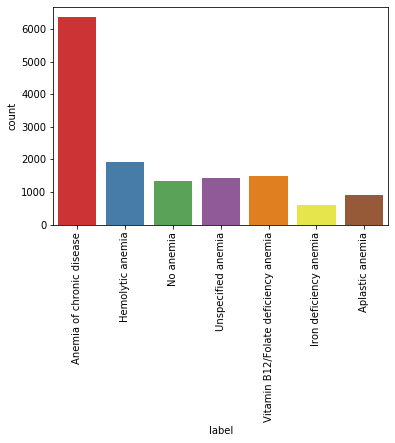

In [24]:
plt.xticks(rotation=90)
sns.countplot(x='label', data=total_sampled_df, palette = 'Set1')

In [28]:
isna_series = total_sampled_df.isna().sum()

In [29]:
def plot_feature_frequencies(df):
    output_df  = pd.DataFrame()
    for col in df.columns:
        if col != 'label':
            missing_num = df.isna().sum()[col]
            present_num = df.notna().sum()[col]
            col_dict = {'feature name':col, 'present': present_num, 'missing':missing_num,}
            output_df = output_df.append(col_dict, ignore_index=True)
    output_df = output_df[['feature name', 'present', 'missing']]
    output_df.plot(x='feature name', kind='bar', figsize=(8,6), stacked=True)
    return output_df

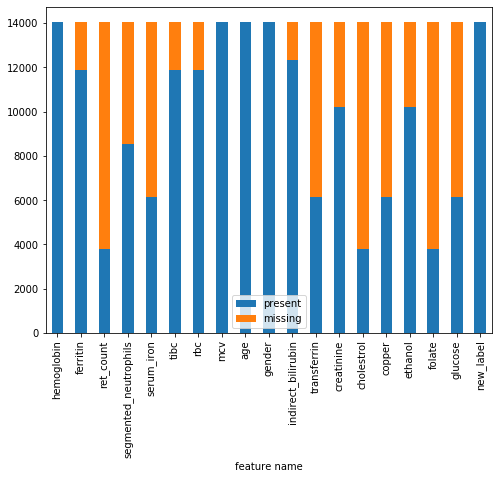

In [30]:
output_df = plot_feature_frequencies(total_sampled_df)